### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm

### Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
  - a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
       respektive dataframe så du får något liknande som nedan.
  - b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.
  - c) Rita ett stapeldiagram på totala poängen för de olika ämnena.
  - d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
  - e) Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [155]:
import pandas as pd

# Läs in filen och sheets
df_riks_2023 = pd.read_excel("../Labb2/data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)

sheets_to_change = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen
def change_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# Loopa genom varje sheet och ändra kolumnnamnen om sheetet finns i sheets_to_change
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

# Visa de första raderna för att kontrollera ändringarna
df_riks_2023['Engelska']


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [137]:
df_math = df_riks_2023["Matematik"]

df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [149]:
# Totalt antal flickor som fått F i matematik
flickor_F = (pd.to_numeric(df_riks_2023["Matematik"]['Flickor (A-F)'], errors='coerce') * 0.0113).sum()
print("Totalt antal flickor som fått F:", round(flickor_F))

# Totalt antal killar som fått F i matematik
killar_F = (pd.to_numeric(df_riks_2023["Matematik"]['Pojkar (A-F)'], errors='coerce') * 0.0105).sum()
print("Totalt antal killar som fått F:", round(killar_F))


Totalt antal flickor som fått F: 1165
Totalt antal killar som fått F: 1160


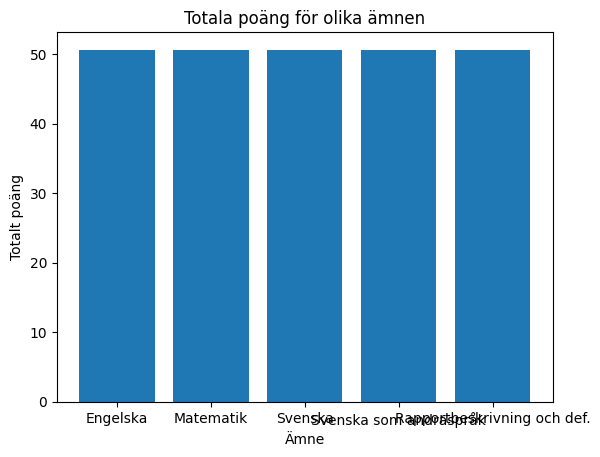

In [154]:
import matplotlib.pyplot as plt

# Loopa genom varje sheet och ändra kolumnnamnen om sheetet finns i sheets_to_change
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

# Skapa ett DataFrame med totala poängen för varje ämne
df_total_points = pd.DataFrame({
    'Ämne': sheets_to_change,
    'Totalt poäng': df_riks_2023['Matematik']['Totalt (poäng)'].astype(float).sum(axis=0)  # Justera här för att hämta specifikt ämne
})

# Rita stapeldiagram
plt.bar(df_total_points['Ämne'], df_total_points['Totalt poäng'])
plt.title('Totala poäng för olika ämnen')
plt.xlabel('Ämne')
plt.ylabel('Totalt poäng')
plt.show()